In [1]:
from utils import read_mp3, normalize_impulse, normalize_impulse_max
import numpy as np
import scipy.signal
import datetime
import matplotlib.pyplot as plt
import IPython

In [2]:
imps = [normalize_impulse(read_mp3("impulses/" + str(i) + ".mp3")[1]) for i in range(1, 6)]
imps_max = [normalize_impulse_max(read_mp3("impulses/" + str(i) + ".mp3")[1]) for i in range(1, 6)]

In [3]:
stfts = [scipy.signal.stft(imp[:, 0], nperseg=128) for imp in imps]

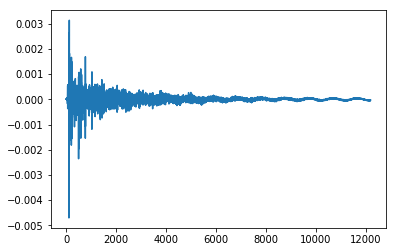

In [8]:
imp_a = imps[3][:,0]

imp_ff = np.fft.fft(imp_a)
plt.plot(imp_a)

In [51]:
import IPython
IPython.display.Audio(a, rate=48000)

/home/joseph/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


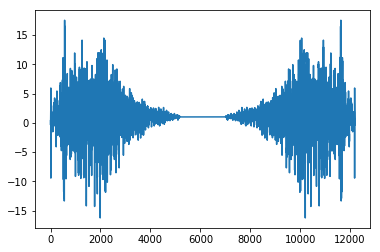

In [7]:
plt.plot(imp_ff)

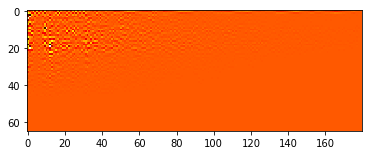

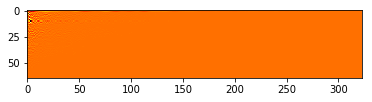

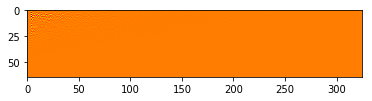

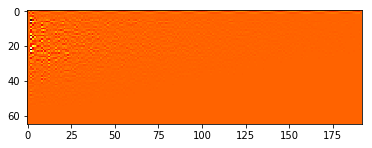

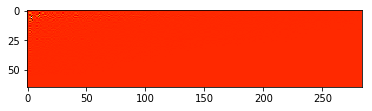

In [4]:
for stft in stfts:
    plt.imshow(stft[2].real, cmap='hot', interpolation='nearest')
    plt.show()

In [5]:
stfts[4][2].real.min()

-0.000574883687210944

In [53]:
from os import listdir

songName = listdir("vocaloid")[142]

In [54]:
a = datetime.datetime.now()
rate, data = read_mp3("vocaloid/" + songName)
scipy.io.wavfile.write("orig.wav", 48000, data)
res = scipy.signal.convolve(data, imps[0]) # used to be imps
res = res / res.max()
scipy.io.wavfile.write("test.wav", 48000, res)
print(datetime.datetime.now() - a)

0:00:06.659280


In [77]:
a = data[0:480000][:,0]

In [74]:
b = scipy.signal.fftconvolve(data[0:480000][:,0], imp_a)

In [ ]:
def wiener(sig, imp, snr=np.inf):
    H = fft(imp)
    G = 

In [81]:
np.fft.ifft(np.fft.fft(a))

array([6.06329801e-17+1.60701082e-16j, 1.21265960e-16-7.56283924e-17j,
       4.85063841e-16-2.83180886e-17j, ...,
       4.50073242e-01+2.81907744e-17j, 4.30328369e-01-1.84989630e-16j,
       5.25817871e-01-1.89751576e-16j])

In [82]:
IPython.display.Audio(a, rate=48000)

In [5]:
start = 5500000
end = 5700000

In [6]:
a = datetime.datetime.now()
rate, data = read_mp3("in.mp3")
scipy.io.wavfile.write("orig.wav", 48000, data[:, 0][start:end])
res = scipy.signal.deconvolve(data[:, 0][start:end], imps_max[0][:, 0])[0]
print(datetime.datetime.now())
print(res)
scipy.io.wavfile.write("test.wav", 48000, res)
print(datetime.datetime.now() - a)

2018-10-10 03:24:19.096301
[-1.30615234e-02 -1.34949095e-02 -1.34392434e-02 ...  2.54273955e+37
  4.04156387e+37  2.78250860e+37]
0:00:22.522784


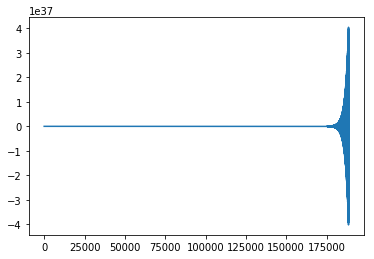

In [7]:
plt.plot(res)

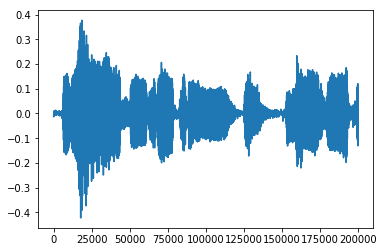

In [8]:
plt.plot(data[:, 0][start:end])

In [8]:
res[100]

-0.06704320366045684

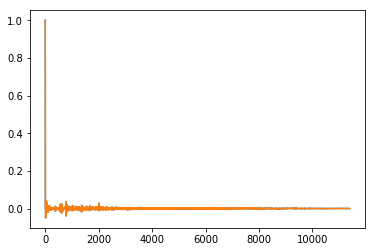

In [9]:
plt.plot(imps_max[0])

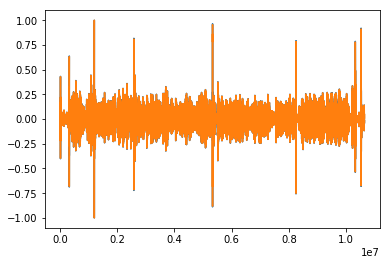

In [11]:

rate, data = read_mp3("in.mp3")

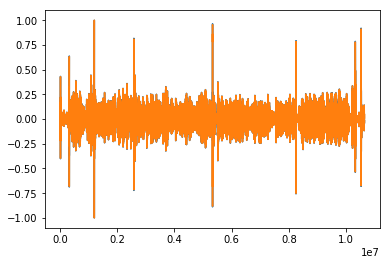

In [12]:

plt.plot(data)